#### **Scaling, Re-sizing, Interpolations and Cropping**

**In this tutorial I am going to do the following:**
* How to re-size and scale images
* Image Pyramids
* Cropping

### **Re-sizing**

![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/Resizing.png)

Re-sizing is a simple function that we execute using the `cv2.resize` function, it's arguments are:

```cv2.resize(image, dsize(output image size), x scale, y scale, interpolation)```
- if dsize is `None` the output image is calculated as a function of scaling using `x` & `y` scale 

#### **List of Interpolation Methods:**
- `cv2.INTER_AREA` - Good for shrinking or down sampling
- `cv2.INTER_NEAREST` - Fastest
- `cv2.INTER_LINEAR` - Good for zooming or up sampling (default)
- `cv2.INTER_CUBIC` - Better
- `cv2.INTER_LANCZOS4` - Best

In [4]:
All# Import required libraries 
import cv2
import numpy as np 
import matplotlib.pyplot as plt

In [5]:
# Create a helper function to display an image 
def display_image(title="", image=None, size=10):
  """
  This function takes an image as an input and returns a displayed image.
  """

  w, h = image.shape[0], image.shape[1]
  aspect_ratio = w/h 
  plt.figure(figsize=(size * aspect_ratio, size))
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  plt.title(title)
  plt.show() # display the image



In [6]:
# Download images 
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip

# Unzip images folder
!unzip -qq images.zip

--2022-06-29 21:15:02--  https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
Resolving moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)... 52.95.148.186
Connecting to moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)|52.95.148.186|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29586716 (28M) [application/zip]
Saving to: ‘images.zip.1’

images.zip.1        100%[===================>]  28.22M  18.3MB/s    in 1.5s    

2022-06-29 21:15:04 (18.3 MB/s) - ‘images.zip.1’ saved [29586716/29586716]

replace images/castara.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: All


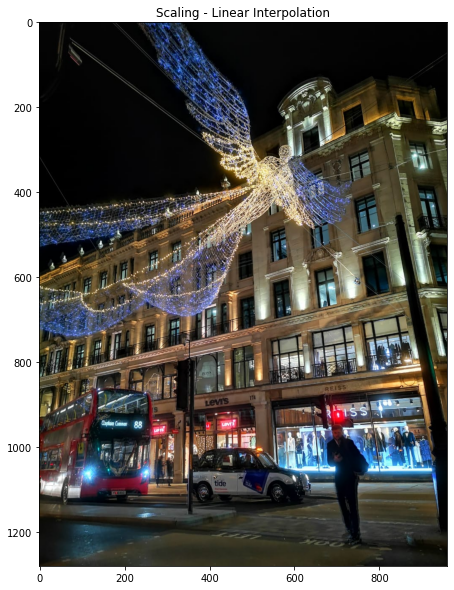

In [19]:
# Load input image 
image = cv2.imread("/content/images/londonxmas.jpeg")
display_image("Scaling - Linear Interpolation", image) # If no interpolation is specified cv.INTER_LINEAR is used as default

```cv2.resize(image, dsize(output image size), x scale, y scale, interpolation)```

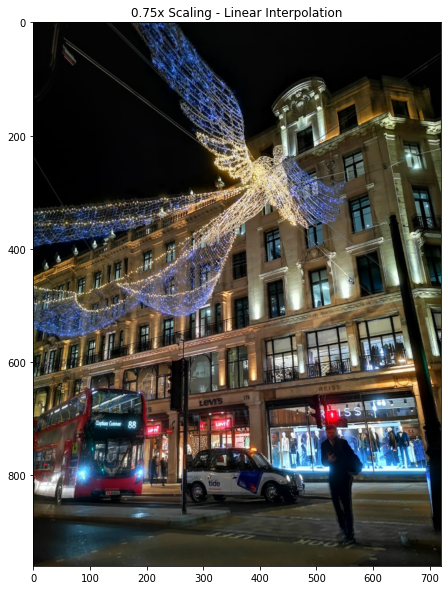

In [20]:
image_scaled = cv2.resize(image, None, fx=0.75, fy=0.75)
display_image("0.75x Scaling - Linear Interpolation", image_scaled)

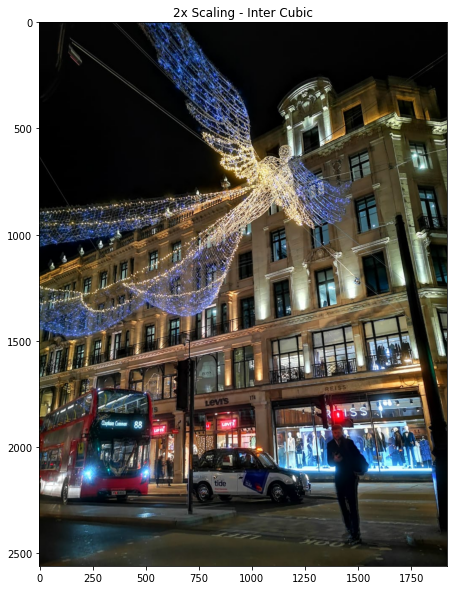

In [21]:
# Let's double the size of our image
img_scaled2 = cv2.resize(image, None, fx=2, fy=2, interpolation = cv2.INTER_CUBIC)
display_image("2x Scaling - Inter Cubic", img_scaled2)

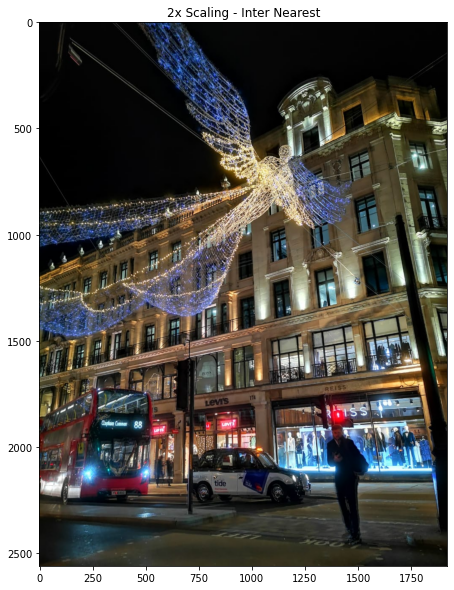

In [22]:
# Let's double the size of our image using inter_nearest interpolation
img_scaled3 = cv2.resize(image, None, fx=2, fy=2, interpolation = cv2.INTER_NEAREST)
display_image("2x Scaling - Inter Nearest", img_scaled3)

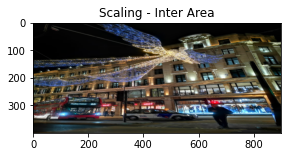

In [23]:
# Let's skew the re-sizing by setting exact dimensions
img_scaled4 = cv2.resize(image, (900, 400), interpolation = cv2.INTER_AREA)
display_image("Scaling - Inter Area", img_scaled4)

#### **Image Pyraminds**

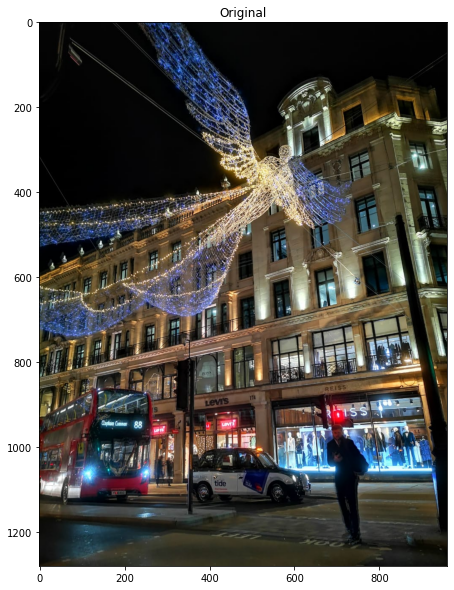

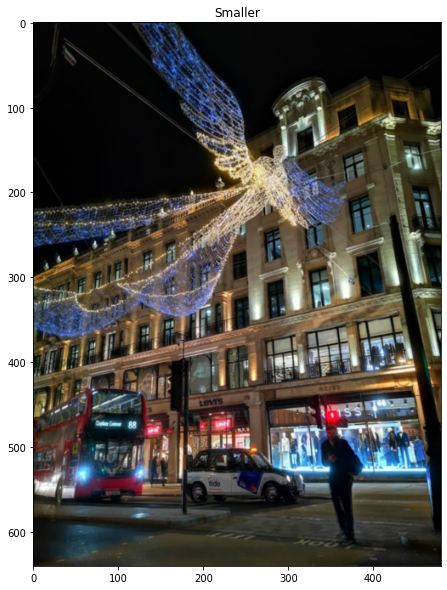

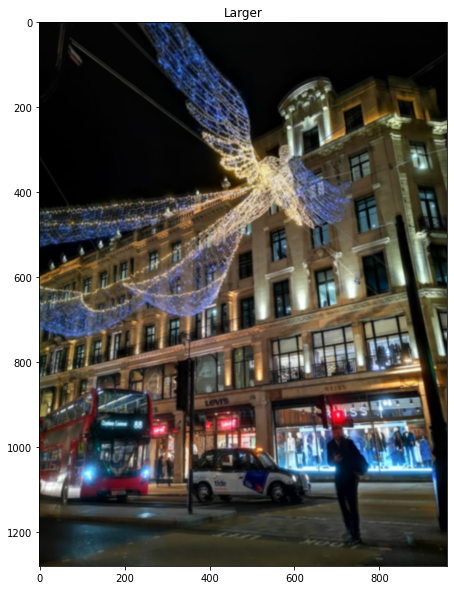

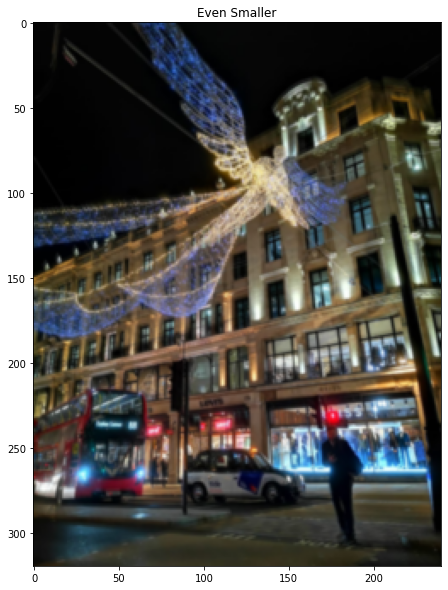

In [25]:
# Load input image
image = cv2.imread("/content/images/londonxmas.jpeg")

smaller = cv2.pyrDown(image) # scale down
larger = cv2.pyrUp(smaller)  # scale up

display_image("Original", image)
display_image("Smaller", smaller)
display_image("Larger", larger)

even_smaller = cv2.pyrDown(smaller)
display_image("Even Smaller", even_smaller)

#### **Cropping**

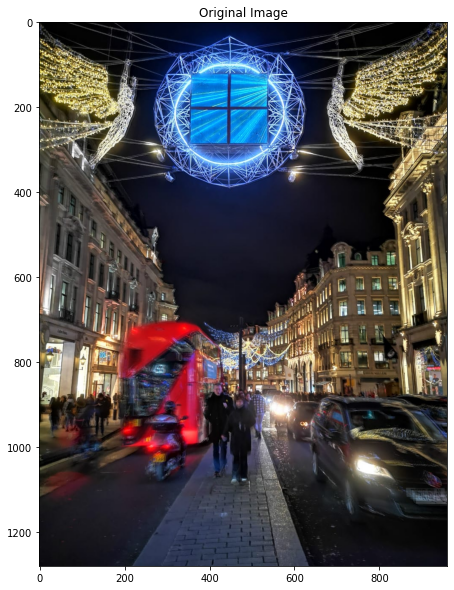

(1280, 960)

In [29]:
# Load input image
image = cv2.imread("/content/images/londonxmas2.jpeg")
display_image("Original Image", image)
image.shape[:2] #height, width

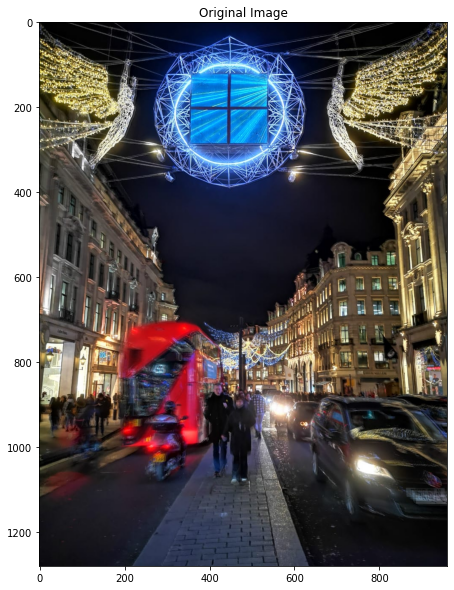

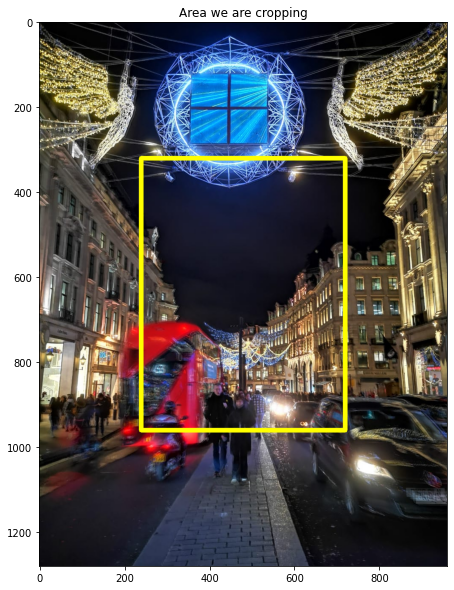

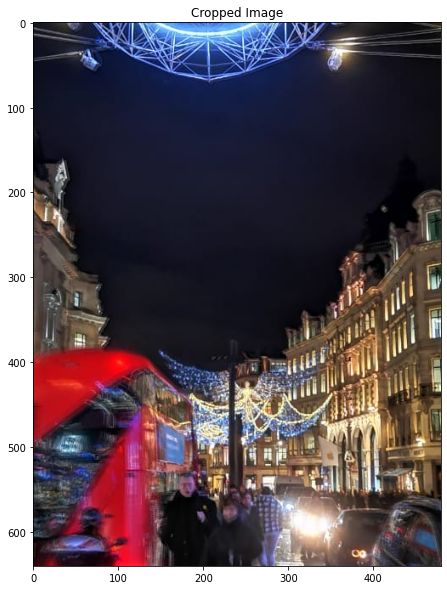

In [30]:
# Load input image
image = cv2.imread("/content/images/londonxmas2.jpeg")

# Get our image dimensions
height, width = image.shape[:2]

# Let's get the starting pixel coordiantes (top  left of cropping rectangle)
# using 0.25 to get the x,y position that is 1/4 down from the top left (0,0)
start_row, start_col = int(height * .25), int(width * .25)

# Let's get the ending pixel coordinates (bottom right)
end_row, end_col = int(height * .75), int(width * .75)

# Simply use indexing to crop out the rectangle we desire
cropped = image[start_row:end_row , start_col:end_col]

display_image("Original Image", image)

# The cv2.rectangle function draws a rectangle over our image (in-place operation)
copy = image.copy()
cv2.rectangle(copy, (start_col,start_row), (end_col,end_row), (0,255,255), 10)

display_image("Area we are cropping", copy)

display_image("Cropped Image", cropped) 

### References: 

* [OpenCV Documentation](https://docs.opencv.org/4.x/)